In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Necessary python package 

import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import pos_tag, word_tokenize, wordpunct_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
import itertools
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud




In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
#Read train and test dataset in csv file from our google shared drive

traindf = pd.read_csv('/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/covid19_train_data_two.csv')
testdf = pd.read_csv('/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/covid19_test_data_two.csv')

In [5]:
traindf

,text,class_label
0,Recent #graduates: how has covid-19 impacted y...,SPAM
1,@rednym Those folks are unrepentantly corrupt....,SPAM
2,Outbreak reported at Peterborough student resi...,SPAM
3,"574 Covid-19 patients recovered, confirmed the...",HAM
4,@wardtours @scottjlawson @Motughosh as Eircode...,SPAM
...,...,...
4419,@MatAshimolowo Someone should please help me w...,SPAM
4420,Great decision by PM @JustinTrudeau\n &amp; F...,SPAM
4421,Covid-19 really made everyone lose a year of t...,SPAM
4422,What we’re seeing is a decline in perfectly he...,SPAM


In [6]:
testdf

,text,class_label
0,Weed is the cure for Covid 19\n\nMe: https://t...,SPAM
1,"""#IPRs &amp; WTO waivers in the time of COVID-...",SPAM
2,You can now select your second preference of a...,SPAM
3,Arrests at Copenhagen anti-lockdown demonstrat...,SPAM
4,OnlineKhabar: Nepal Covid-19 tally: 78 new cas...,HAM
...,...,...
995,Great decision by PM @JustinTrudeau\n &amp; F...,SPAM
996,#Iraq #Covid_19 #PopeFrancisInIraq @Pontifex\n...,SPAM
997,The PANCAP Toolkit for social contracting will...,SPAM
998,Covid-19 news: One dose of Pfizer vaccine grea...,SPAM


In [7]:
traindf_ham = traindf.loc[traindf['class_label'] == 'HAM']
traindf_ham

,text,class_label
3,"574 Covid-19 patients recovered, confirmed the...",HAM
10,"DZRH SPECIAL COVERAGE | Arrival of 600,000 dos...",HAM
20,.@KFF found most Americans consider advice fro...,HAM
23,@BBCPolitics @BBCNews WORLD. \n\nCOVID-19 D...,HAM
26,Philippines receives COVID-19 vaccine after de...,HAM
...,...,...
4376,Johnson &amp; Johnson’s single-shot Janssen CO...,HAM
4406,Exclusive News: COVID-19 Vaccine: Pay Rs 250 P...,HAM
4410,"COVID-19 vaccines arrive Nigeria Monday, Says ...",HAM
4414,Residents of Ho peddle conspiracy theories aga...,HAM


In [8]:
traindf_spam = traindf.loc[traindf['class_label'] == 'SPAM']
traindf_spam

,text,class_label
0,Recent #graduates: how has covid-19 impacted y...,SPAM
1,@rednym Those folks are unrepentantly corrupt....,SPAM
2,Outbreak reported at Peterborough student resi...,SPAM
4,@wardtours @scottjlawson @Motughosh as Eircode...,SPAM
5,With the private sector joining the Covid-19 i...,SPAM
...,...,...
4419,@MatAshimolowo Someone should please help me w...,SPAM
4420,Great decision by PM @JustinTrudeau\n &amp; F...,SPAM
4421,Covid-19 really made everyone lose a year of t...,SPAM
4422,What we’re seeing is a decline in perfectly he...,SPAM


In [9]:
#Read train and test dataset in csv file from our google shared drive (spam and ham separately)

traindf_ham.to_csv('/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/covid19-train-data_ham_two.csv')
traindf_spam.to_csv('/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/covid19-train-data_spam_two.csv')

In [10]:
#count the number of spam and ham separately.

#Counting number
print('---------Counting number---------')
traindf['class_label'].value_counts()



---------Counting number---------


SPAM    3827
HAM      597
Name: class_label, dtype: int64

In [12]:
#Probability  Ratio
print('---------Probability  Ratio---------')
traindf['class_label'].value_counts(normalize=True)

---------Probability  Ratio---------


SPAM    0.865054
HAM     0.134946
Name: class_label, dtype: float64

In [13]:
#combine train and test dataset
combine_frame = pd.concat([traindf,testdf], ignore_index=True)

In [14]:
combine_frame

,text,class_label
0,Recent #graduates: how has covid-19 impacted y...,SPAM
1,@rednym Those folks are unrepentantly corrupt....,SPAM
2,Outbreak reported at Peterborough student resi...,SPAM
3,"574 Covid-19 patients recovered, confirmed the...",HAM
4,@wardtours @scottjlawson @Motughosh as Eircode...,SPAM
...,...,...
5419,Great decision by PM @JustinTrudeau\n &amp; F...,SPAM
5420,#Iraq #Covid_19 #PopeFrancisInIraq @Pontifex\n...,SPAM
5421,The PANCAP Toolkit for social contracting will...,SPAM
5422,Covid-19 news: One dose of Pfizer vaccine grea...,SPAM


In [15]:
combine_frame['class_label'] = [1 if c=='SPAM' else 0 for c in combine_frame.class_label]

combine_frame['class_label'].value_counts()

1    4711
0     713
Name: class_label, dtype: int64

In [16]:
#resample datasets
from sklearn.utils import resample
df_majority = combine_frame[combine_frame.class_label == 1]
df_minority = combine_frame[combine_frame.class_label == 0]

#Upsample minority class
df_minority_upsampled = resample(df_minority,
                                   replace=True,
                                   n_samples=4711,
                                   random_state=123)

#Combine majority class with upsampled minorirty class
combine_frame_upsampled = pd.concat([df_majority, df_minority_upsampled])

#Display new class counts
combine_frame_upsampled.class_label.value_counts()

1    4711
0    4711
Name: class_label, dtype: int64

In [17]:
combine_frame_upsampled.to_csv("/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/resample/resample_dataset_two.csv")

In [18]:
#clean tweets that have have links and emogi
combine_frame_upsampled['text_cl'] = combine_frame_upsampled['text'].apply(lambda x: re.split('https:\/\/.*|[^\x00-\x7F]', str(x))[0])
clean_links = pd.DataFrame(data=combine_frame_upsampled['text_cl'],
                           columns=["text_cl"])

clean_links

,text_cl
0,Recent #graduates: how has covid-19 impacted y...
1,@rednym Those folks are unrepentantly corrupt....
2,Outbreak reported at Peterborough student resi...
4,@wardtours @scottjlawson @Motughosh as Eircode...
5,With the private sector joining the Covid-19 i...
...,...
1291,HEALTH CS Kagwe says COVID-19 vaccine due in K...
4032,The Philippines is receiving its first batch o...
4594,Guatemala President Thanks PM Modi As India Do...
2293,#Philippines receives first batch of #COVID19v...


In [19]:
#Change tweets to be lower_case at all
text_lower_case = clean_links['text_cl'].str.lower()

text_lower_case

0       recent #graduates: how has covid-19 impacted y...
1       @rednym those folks are unrepentantly corrupt....
2       outbreak reported at peterborough student resi...
4       @wardtours @scottjlawson @motughosh as eircode...
5       with the private sector joining the covid-19 i...
                              ...                        
1291    health cs kagwe says covid-19 vaccine due in k...
4032    the philippines is receiving its first batch o...
4594    guatemala president thanks pm modi as india do...
2293    #philippines receives first batch of #covid19v...
1669    the us food and drug administration authorized...
Name: text_cl, Length: 9422, dtype: object

In [20]:
#make corpus
corpus = text_lower_case.to_list()
corpus

['recent #graduates: how has covid-19 impacted your career after leaving @edinuni ? take part in this short survey to let us know what support you need #haveyoursay ',
 '@rednym those folks are unrepentantly corrupt. by now i was thinking we',
 'outbreak reported at peterborough student residence ',
 '@wardtours @scottjlawson @motughosh as eircode cannot be used for sorting many courier companies have not integrated it. they therefore leave it up to drivers to decide if they will get/use it themselves. this option allows them continue use addressing as an excuse for poor service!\n',
 'with the private sector joining the covid-19 inoculation drive from march 1, forbes india deconstructs the immunisation plan to find out if will help speed up the current laggard pace @divyajshekhar &amp; @mbalachandran88 ',
 '@genekahn there is no covid-19.\n\n',
 'answers to frequently asked questions on covid-19 vaccines ',
 '',
 'gopq senate opposed biden\'s plan to recuse economy, covid-19 crisis &a

In [21]:
#make word martrix for tagging only noun word.
word_matrix = []
for text in corpus:
  tknzr = TweetTokenizer(strip_handles=True)
  stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()
  stem_words = stemmer.stem(text)
  lemma_words = lemmatizer.lemmatize(stem_words)
  sentence = tknzr.tokenize(lemma_words)
  sent = pos_tag(sentence)
  sent_clean = [word for (word, pos) in sent if(pos == 'NN' or pos == 'NNPS')]
  corpus2 = ' '.join(sent_clean)
  word_matrix.append(corpus2)

In [22]:
word_matrix

['career part survey support',
 'i w',
 'outbreak student residence',
 'eircode cannot courier use option excuse service',
 'sector covid inoculation drive march immunisation plan laggard pace',
 '',
 '',
 '',
 "gopq senate biden's plan economy crisis yrs governance kickback form poverty class bbb",
 'god girl home',
 'bus security',
 'fast pre-register covid vaccine',
 'program / article bill covid relief bill nothing please explain thank',
 'york covid',
 'morning pnp luna re curfew implementation health relation number infection place luna quezon',
 '#goptrumptaxscam cost relief package relief package need tax sham',
 'anyone coding conference science',
 'vaccine passport app work',
 'i share california work',
 'region crisis famine shortage water side covid fgs jls emergency response region',
 'state hospital icu capacity',
 'oxford study ireland country europe covid w',
 'japan vaccine supply april kono',
 'cpp vaccine news weekend',
 'ema review celltrion antibody regdanvimab age

In [23]:
#Bag of Words (BoW) Term Frequency
#Bag of Words (BoW) Term Frequency captures frequency of term in document. 
#Under TfidfVectorizer, we set binary parameter equal to false 
#so that it can show the actual frequency of the term and norm parameter 
#equal to none.
from sklearn.feature_extraction.text import TfidfVectorizer

tfvec_text = TfidfVectorizer(input=word_matrix, stop_words = 'english' , norm="l2",
                             lowercase=True,min_df=1, max_df=1.0,max_features=None,ngram_range=(1,1))

text_n =  pd.DataFrame(tfvec_text.fit_transform(word_matrix).toarray(), columns=tfvec_text.get_feature_names())



In [24]:
text_n

,039,079,11,12,130,19,20,20email,20latest,20request,20update_13022021,20vaccination,220,28feb,2trillion,34,37,4313355,435,49,514,587,7832,84,976,_19,aabhi,aaj,aarogya,aaron,aarp,ab,abc,abdala,aber,aberration,abiding,abigail,abortion,abracadabra,...,xiaozhan,ya,yahoo,yall,yassin,ydp,yeah,year,yechury,yehi,yennews,yep,yesterday,yolo,york,yorker,yorkshire,yorkshirelive,youth,youtube,ypa,yr,yrs,yup,yuval,ze,zealand,zei,zeman,zeneca,zero,zerocovid,zerohedge,zeropathy,zhan,zimbabwe,zinc,zoo,zoom,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
text_n.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/TFIDF/covid19__tf_idf_two_resampled.csv', encoding='utf-8-sig', index=False)


In [26]:
combine_frame_upsampled['class_label']

0       1
1       1
2       1
4       1
5       1
       ..
1291    0
4032    0
4594    0
2293    0
1669    0
Name: class_label, Length: 9422, dtype: int64

In [27]:
#split the dataset to train and test
from sklearn.model_selection import train_test_split

#30% for test, 70% train split
X_train , X_test, y_train, y_test = train_test_split(text_n, combine_frame_upsampled['class_label'], test_size=0.3, random_state=0)

print('rows in test set: '+ str(X_test.shape))
print('rows in train set: '+ str(X_train.shape))

print('rows in y_test set: '+ str(y_test.shape))
print('rows in y_train set: '+ str(y_train.shape))


rows in test set: (2827, 4477)
rows in train set: (6595, 4477)
rows in y_test set: (2827,)
rows in y_train set: (6595,)


In [28]:
X_train

,039,079,11,12,130,19,20,20email,20latest,20request,20update_13022021,20vaccination,220,28feb,2trillion,34,37,4313355,435,49,514,587,7832,84,976,_19,aabhi,aaj,aarogya,aaron,aarp,ab,abc,abdala,aber,aberration,abiding,abigail,abortion,abracadabra,...,xiaozhan,ya,yahoo,yall,yassin,ydp,yeah,year,yechury,yehi,yennews,yep,yesterday,yolo,york,yorker,yorkshire,yorkshirelive,youth,youtube,ypa,yr,yrs,yup,yuval,ze,zealand,zei,zeman,zeneca,zero,zerocovid,zerohedge,zeropathy,zhan,zimbabwe,zinc,zoo,zoom,zuckerberg
8784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#cross - validation function
n_folds = 10
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


def score_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
  score = cross_val_score(model, X_train.values, y_train, scoring="accuracy",cv=kf)
  print(score)
  return(score)


In [ ]:
#naive_bayes models
from sklearn.naive_bayes import MultinomialNB

#train a naive classifier
naive = MultinomialNB()
naive.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#Cross-Validation score of naive model
score = score_cv(naive)
print("naive score: {:.4f} (S.D: {:.4f}) ".format(score.mean(), score.std()))

[0.81818182 0.81818182 0.83181818 0.81212121 0.82272727 0.83156297
 0.81487102 0.81183612 0.81031866 0.81638847]
naive score: 0.8188 (S.D: 0.0073) 


In [ ]:
#review the naive classifier accuracy (Test)
print("\n naive accuracy: {:.4f}".format(naive.score(X_test,y_test)))


 naive accuracy: 0.8306


In [ ]:
#review the naive classifier accuracy (Train)
print("\n naive accuracy (Train-set): {:.4f}".format(naive.score(X_train,y_train)))


 naive accuracy (Train-set): 0.8670


In [30]:
#Logistic Regression models
from sklearn.linear_model import LogisticRegression

#train a logistic classifier 
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
#Cross-Validation score of logistic model

score = score_cv(logistic)
print("logistic score: {:.4f} (S.D: {:.4f}) ".format(score.mean(), score.std()))

[0.88333333 0.86666667 0.87727273 0.87424242 0.85454545 0.84977238
 0.8983308  0.84825493 0.8801214  0.86646434]
logistic score: 0.8699 (S.D: 0.0152) 


In [32]:
#review the logistic classifier accuracy (Test)
print("\n logistic accuracy: {:.4f}".format(logistic.score(X_test,y_test)))


 logistic accuracy: 0.8875


In [33]:
#review the logistic classifier accuracy (Train)
print("\n logistic accuracy (Train-set): {:.4f}".format(logistic.score(X_train,y_train)))


 logistic accuracy (Train-set): 0.9005


In [ ]:
#SVC model (SVM)
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
#Cross-Validation score of SVC model

score = score_cv(svc)
print("C-Support Vector score: {:.4f} (S.D: {:.4f}) ".format(score.mean(), score.std()))

[0.82878788 0.81666667 0.83484848 0.81363636 0.84848485 0.83611533
 0.81942337 0.81942337 0.82245827 0.81487102]
C-Support Vector score: 0.8255 (S.D: 0.0107) 


In [ ]:
#review the SVC classifier accuracy (Test)
print("\n C-Support Vector accuracy: {:.4f}".format(svc.score(X_test,y_test)))


 C-Support Vector accuracy: 0.8380


In [ ]:
#review the SVC classifier accuracy (Train)
print("\n C-Support Vector accuracy: {:.4f}".format(svc.score(X_train,y_train)))


 C-Support Vector accuracy: 0.8984


In [ ]:
#Adaboost model
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [ ]:
#Cross-Validation score of Ada model

score = score_cv(ada)
print("Ada Vector score: {:.4f} (S.D: {:.4f}) ".format(score.mean(), score.std()))

[0.81515152 0.83030303 0.82727273 0.82424242 0.80454545 0.82094082
 0.84977238 0.79817906 0.81790592 0.81031866]
Ada Vector score: 0.8199 (S.D: 0.0138) 


In [ ]:
#review the Ada classifier accuracy (Test)
print("\n Ada accuracy: {:.4f}".format(ada.score(X_test,y_test)))


 Ada accuracy: 0.8341


In [ ]:
#review the Ada classifier accuracy (Train)
print("\n Ada accuracy: {:.4f}".format(ada.score(X_train,y_train)))


 Ada Vector accuracy: 0.8415


In [35]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
#classification report (naive-test)

labels = naive.predict(X_test)
actual = y_test.to_list()
predicted = labels 
result = confusion_matrix(actual, predicted)

print('Confusion Matrix (Naive-Test) :')
print(result)
print('Accuracy Score :', accuracy_score(actual,predicted))
print('Report :')
print(classification_report(actual, predicted))

score_2 = f1_score(actual, predicted, average='binary')
print('F-measure: {:.4f}'.format(score_2))

Confusion Matrix (Naive-Test) :
[[1375   37]
 [ 442  973]]
Accuracy Score : 0.8305624336752742
Report :
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1412
           1       0.96      0.69      0.80      1415

    accuracy                           0.83      2827
   macro avg       0.86      0.83      0.83      2827
weighted avg       0.86      0.83      0.83      2827

F-measure: 0.8025


In [ ]:
#classification report (naive-train)

t_labels = naive.predict(X_train)

t_actual = y_train.to_list()
t_predicted = t_labels 
t_result = confusion_matrix(t_actual, t_predicted)

print('Confusion Matrix (Naive-Train) :')
print(t_result)
print('Accuracy Score :', accuracy_score(t_actual,t_predicted))
print('Report :')
print(classification_report(t_actual, t_predicted))

t_score_2 = f1_score(t_actual, t_predicted, average='binary')
print('F-measure: {:.4f}'.format(t_score_2))

Confusion Matrix (Naive-Train) :
[[3240   59]
 [ 818 2478]]
Accuracy Score : 0.8670204700530705
Report :
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      3299
           1       0.98      0.75      0.85      3296

    accuracy                           0.87      6595
   macro avg       0.89      0.87      0.87      6595
weighted avg       0.89      0.87      0.87      6595

F-measure: 0.8496


In [36]:
#classification report (logistic-test)

labels_logi = logistic.predict(X_test)

actual_logi = y_test.to_list()
predicted_logi = labels_logi 
result_logi = confusion_matrix(actual_logi, predicted_logi)

print('Confusion Matrix (Logistic-Test) :')
print(result_logi)
print('Accuracy Score :', accuracy_score(actual_logi,predicted_logi))
print('Report :')
print(classification_report(actual_logi, predicted_logi))

score_2_logi = f1_score(actual_logi, predicted_logi, average='binary')
print('F-measure: {:.4f}'.format(score_2_logi))

Confusion Matrix (Logistic-Test) :
[[1249  163]
 [ 155 1260]]
Accuracy Score : 0.8875132649451716
Report :
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1412
           1       0.89      0.89      0.89      1415

    accuracy                           0.89      2827
   macro avg       0.89      0.89      0.89      2827
weighted avg       0.89      0.89      0.89      2827

F-measure: 0.8879


In [41]:
#classification report (logistic-train)
t_labels_logi = logistic.predict(X_train)

t_actual_logi = y_train.to_list()
t_predicted_logi = t_labels_logi 
t_result_logi = confusion_matrix(t_actual_logi, t_predicted_logi)

print('Confusion Matrix (Logistic-Train) :')
print(t_result_logi)
print('Accuracy Score :', accuracy_score(t_actual_logi,t_predicted_logi))
print('Report :')
print(classification_report(t_actual_logi, t_predicted_logi))

t_score_2_logi = f1_score(t_actual_logi, t_predicted_logi, average='binary')
print('F-measure: {:.4f}'.format(t_score_2_logi))

Confusion Matrix (Logistic-Train) :
[[2969  330]
 [ 326 2970]]
Accuracy Score : 0.9005307050796058
Report :
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3299
           1       0.90      0.90      0.90      3296

    accuracy                           0.90      6595
   macro avg       0.90      0.90      0.90      6595
weighted avg       0.90      0.90      0.90      6595

F-measure: 0.9005


In [ ]:
#classification report (SVC-test)

labels_svc = svc.predict(X_test)

actual_svc = y_test.to_list()
predicted_svc = labels_svc 
result_svc = confusion_matrix(actual_svc, predicted_svc)

print('Confusion Matrix (SVC-Test) :')
print(result_svc)
print('Accuracy Score :', accuracy_score(actual_svc,predicted_svc))
print('Report :')
print(classification_report(actual_svc, predicted_svc))

score_2_svc = f1_score(actual_svc, predicted_svc, average='binary')
print('F-measure: {:.4f}'.format(score_2_svc))

Confusion Matrix (SVC-Test) :
[[1391   21]
 [ 437  978]]
Accuracy Score : 0.8379908029713478
Report :
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1412
           1       0.98      0.69      0.81      1415

    accuracy                           0.84      2827
   macro avg       0.87      0.84      0.83      2827
weighted avg       0.87      0.84      0.83      2827

F-measure: 0.8103


In [ ]:
#classification report (SVC-train)
t_labels_svc = svc.predict(X_train)

t_actual_svc = y_train.to_list()
t_predicted_svc = t_labels_svc 
t_result_svc = confusion_matrix(t_actual_svc, t_predicted_svc)

print('Confusion Matrix (SVC-Train) :')
print(t_result_svc)
print('Accuracy Score :', accuracy_score(t_actual_svc,t_predicted_svc))
print('Report :')
print(classification_report(t_actual_svc, t_predicted_svc))

t_score_2_svc = f1_score(t_actual_svc, t_predicted_svc, average='binary')
print('F-measure: {:.4f}'.format(t_score_2_svc))

Confusion Matrix (SVC-Train) :
[[3284   15]
 [ 655 2641]]
Accuracy Score : 0.8984078847611827
Report :
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3299
           1       0.99      0.80      0.89      3296

    accuracy                           0.90      6595
   macro avg       0.91      0.90      0.90      6595
weighted avg       0.91      0.90      0.90      6595

F-measure: 0.8874


In [ ]:
#classification report (Ada-test)

labels_ada = ada.predict(X_test)

actual_ada = y_test.to_list()
predicted_ada = labels_ada 
result_ada = confusion_matrix(actual_ada, predicted_ada)

print('Confusion Matrix (Ada-Test) :')
print(result_ada)
print('Accuracy Score :', accuracy_score(actual_ada,predicted_ada))
print('Report :')
print(classification_report(actual_ada, predicted_ada))

score_2_ada = f1_score(actual_ada, predicted_ada, average='binary')
print('F-measure: {:.4f}'.format(score_2_ada))

Confusion Matrix (Ada-Test) :
[[1146  266]
 [ 203 1212]]
Accuracy Score : 0.8340997523876902
Report :
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1412
           1       0.82      0.86      0.84      1415

    accuracy                           0.83      2827
   macro avg       0.83      0.83      0.83      2827
weighted avg       0.83      0.83      0.83      2827

F-measure: 0.8379


In [ ]:
#classification report (Ada-train)
t_labels_ada = ada.predict(X_train)

t_actual_ada = y_train.to_list()
t_predicted_ada = t_labels_ada 
t_result_ada = confusion_matrix(t_actual_ada, t_predicted_ada)

print('Confusion Matrix (Ada-Train) :')
print(t_result_ada)
print('Accuracy Score :', accuracy_score(t_actual_ada,t_predicted_ada))
print('Report :')
print(classification_report(t_actual_ada, t_predicted_ada))

t_score_2_ada = f1_score(t_actual_ada, t_predicted_ada, average='binary')
print('F-measure: {:.4f}'.format(t_score_2_ada))

Confusion Matrix (Ada-Train) :
[[2671  628]
 [ 417 2879]]
Accuracy Score : 0.8415466262319939
Report :
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      3299
           1       0.82      0.87      0.85      3296

    accuracy                           0.84      6595
   macro avg       0.84      0.84      0.84      6595
weighted avg       0.84      0.84      0.84      6595

F-measure: 0.8464


In [37]:
import seaborn as sns
import numpy as np

In [ ]:
#heatmap for confusion matrix (Naive-Test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     result.flatten()/np.sum(result)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(result, annot=labels, fmt='', cmap='Reds').set_title("confusion matrix (Naive-Test)")

Text(0.5, 1.0, 'confusion matrix (Naive-Train)')

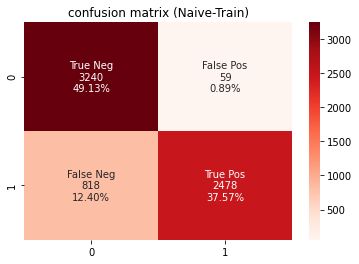

In [ ]:
#heatmap for confusion matrix (Naive-Train)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               t_result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     t_result.flatten()/np.sum(t_result)]
t_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
t_labels = np.asarray(t_labels).reshape(2,2)
sns.heatmap(t_result, annot=t_labels, fmt='', cmap='Reds').set_title("confusion matrix (Naive-Train)")

Text(0.5, 1.0, 'confusion matrix (logistic-Test)')

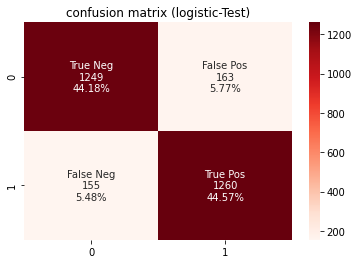

In [42]:
#heatmap for confusion matrix (logistic-Test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               result_logi.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     result_logi.flatten()/np.sum(result_logi)]
labels_logi = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels_logi = np.asarray(labels_logi).reshape(2,2)
sns.heatmap(result_logi, annot=labels_logi, fmt='', cmap='Reds').set_title("confusion matrix (logistic-Test)")

Text(0.5, 1.0, 'confusion matrix (logistic-Train)')

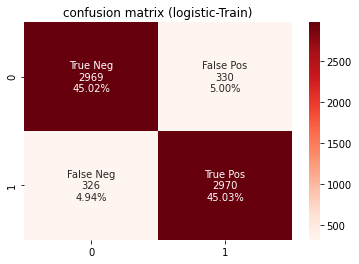

In [43]:
#heatmap for confusion matrix (logistic-Train)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               t_result_logi.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     t_result_logi.flatten()/np.sum(t_result_logi)]
t_labels_logi = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
t_labels_logi = np.asarray(t_labels_logi).reshape(2,2)
sns.heatmap(t_result_logi, annot=t_labels_logi, fmt='', cmap='Reds').set_title("confusion matrix (logistic-Train)")

Text(0.5, 1.0, 'confusion matrix (SVC-Test)')

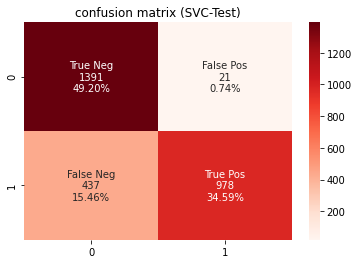

In [ ]:
#heatmap for confusion matrix (SVC-Test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               result_svc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     result_svc.flatten()/np.sum(result_svc)]
labels_svc = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels_svc = np.asarray(labels_svc).reshape(2,2)
sns.heatmap(result_svc, annot=labels_svc, fmt='', cmap='Reds').set_title("confusion matrix (SVC-Test)")

Text(0.5, 1.0, 'confusion matrix (SVC-Train)')

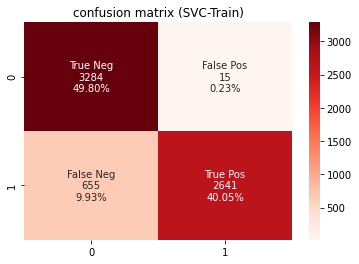

In [ ]:
#heatmap for confusion matrix (SVC-Train)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               t_result_svc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     t_result_svc.flatten()/np.sum(t_result_svc)]
t_labels_svc = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
t_labels_svc = np.asarray(t_labels_svc).reshape(2,2)
sns.heatmap(t_result_svc, annot=t_labels_svc, fmt='', cmap='Reds').set_title("confusion matrix (SVC-Train)")

Text(0.5, 1.0, 'confusion matrix (Ada-Test)')

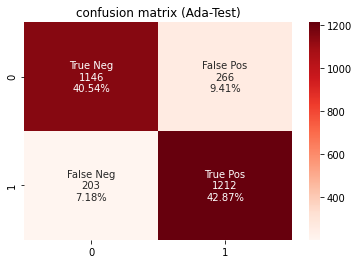

In [ ]:
#heatmap for confusion matrix (Ada-Test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               result_ada.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     result_ada.flatten()/np.sum(result_ada)]
labels_ada = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels_ada = np.asarray(labels_ada).reshape(2,2)
sns.heatmap(result_ada, annot=labels_ada, fmt='', cmap='Reds').set_title("confusion matrix (Ada-Test)")

Text(0.5, 1.0, 'confusion matrix (Ada-Test)')

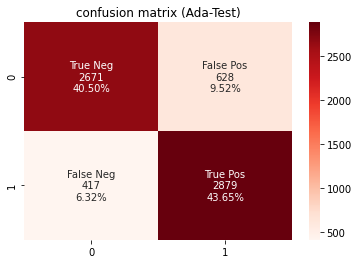

In [ ]:
#heatmap for confusion matrix (Ada-Train)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               t_result_ada.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     t_result_ada.flatten()/np.sum(t_result_ada)]
t_labels_ada = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
t_labels_ada = np.asarray(t_labels_ada).reshape(2,2)
sns.heatmap(t_result_ada, annot=t_labels_ada, fmt='', cmap='Reds').set_title("confusion matrix (Ada-Test)")

In [ ]:
predicted

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
X_test

,039,079,11,12,130,19,20,20email,20latest,20request,20update_13022021,20vaccination,220,28feb,2trillion,34,37,4313355,435,49,514,587,7832,84,976,_19,aabhi,aaj,aarogya,aaron,aarp,ab,abc,abdala,aber,aberration,abiding,abigail,abortion,abracadabra,...,xiaozhan,ya,yahoo,yall,yassin,ydp,yeah,year,yechury,yehi,yennews,yep,yesterday,yolo,york,yorker,yorkshire,yorkshirelive,youth,youtube,ypa,yr,yrs,yup,yuval,ze,zealand,zei,zeman,zeneca,zero,zerocovid,zerohedge,zeropathy,zhan,zimbabwe,zinc,zoo,zoom,zuckerberg
5582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.695573,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.299647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train

,039,079,11,12,130,19,20,20email,20latest,20request,20update_13022021,20vaccination,220,28feb,2trillion,34,37,4313355,435,49,514,587,7832,84,976,_19,aabhi,aaj,aarogya,aaron,aarp,ab,abc,abdala,aber,aberration,abiding,abigail,abortion,abracadabra,...,xiaozhan,ya,yahoo,yall,yassin,ydp,yeah,year,yechury,yehi,yennews,yep,yesterday,yolo,york,yorker,yorkshire,yorkshirelive,youth,youtube,ypa,yr,yrs,yup,yuval,ze,zealand,zei,zeman,zeneca,zero,zerocovid,zerohedge,zeropathy,zhan,zimbabwe,zinc,zoo,zoom,zuckerberg
8784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test

1419    0
985     1
1100    0
3571    0
903     1
       ..
3668    0
4787    1
2357    1
4556    0
2752    0
Name: class_label, Length: 2827, dtype: int64

In [ ]:
X1_train , X1_test, y1_train, y1_test = train_test_split(combine_frame_upsampled["text"], combine_frame_upsampled['class_label'], test_size=0.3, random_state=0)


In [ ]:
X1_train

1548    Arunachal Pradesh becomes COVID-19 free with z...
89      Many hospitals and clinics give priority to th...
2403    The #COVID19 vaccine developed and produced by...
4355    @modernghanaweb Are Ghanaian scientists capabl...
5290    $171B to Covid-19 relief means $1.720T to Nast...
                              ...                        
2848    America Authorizes Johnson &amp; Johnson's COV...
2794    I stand corrected, there is data for adverse e...
3734    Covid-19 Vaccine Q&amp;A. #ScienceUpFirst http...
3760    @TinpotJ "So god loves me, but also made covid...
3152    @lourdesgnavarro @NPR @NPRWeekend I arrived in...
Name: text, Length: 6595, dtype: object

In [ ]:
X1_test

1419    Six new COVID-19 cases Saturday: MLHU | CTV Ne...
985     All You Need to Know': Here Are the 210 House ...
1100    Covid-19: U.S. authorizes Johnson &amp; Johnso...
3571    @radgeworlds @putey_pute How many Scots have b...
903     Yeah...COVID-19 is still a thing in 2021 in ca...
                              ...                        
3668    Delhi records 197 new COVID-19 cases; one more...
4787    As people talk about inequalities in experienc...
2357    @DerekGhaney @CBCNews Lots of people like them...
4556    COVID-19: Nigeria gets vaccine March 2 – Boss ...
2752    New post: Spike continues, record 263 new Covi...
Name: text, Length: 2827, dtype: object

In [ ]:
#---------------- Naive-Test-------------------
predicted_d = {'text': X1_test, 'class-label':y_test,'predicted': predicted }
predicted_df = pd.DataFrame(data=predicted_d)

predicted_df['class-label'] = predicted_df['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
predicted_df['predicted'] = predicted_df['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

predicted_df

,text,class-label,predicted
1419,Six new COVID-19 cases Saturday: MLHU | CTV Ne...,HAM,HAM
985,All You Need to Know': Here Are the 210 House ...,SPAM,SPAM
1100,Covid-19: U.S. authorizes Johnson &amp; Johnso...,HAM,HAM
3571,@radgeworlds @putey_pute How many Scots have b...,HAM,HAM
903,Yeah...COVID-19 is still a thing in 2021 in ca...,SPAM,SPAM
...,...,...,...
3668,Delhi records 197 new COVID-19 cases; one more...,HAM,HAM
4787,As people talk about inequalities in experienc...,SPAM,SPAM
2357,@DerekGhaney @CBCNews Lots of people like them...,SPAM,SPAM
4556,COVID-19: Nigeria gets vaccine March 2 – Boss ...,HAM,HAM


In [ ]:
naive_test_wrong_pred = (predicted_df["class-label"]=="SPAM") & (predicted_df["predicted"]=="HAM")
naive_test_wrong_pred_df = predicted_df.loc[naive_test_wrong_pred, ["text","class-label","predicted"]]
naive_test_wrong_pred_df

,text,class-label,predicted
668,Germany limits travel from French region over ...,SPAM,HAM
2073,@Corbieres999 @AlistairNic @ClarkeMicah She sa...,SPAM,HAM
3121,@MrFHernandez https://t.co/8r6pAFeFwF. Call ev...,SPAM,HAM
3151,"“#NIH, unfortunately, has played a major role ...",SPAM,HAM
3025,@Yana10198010 @Remisagoodboy I want H&amp;M’s ...,SPAM,HAM
...,...,...,...
1712,» The connection between Covid-19 and inequali...,SPAM,HAM
3279,Ireland's COVID-19 Data Hub - Total hospitaliz...,SPAM,HAM
4744,@devisridhar https://t.co/eVh34cIxrX stop scam...,SPAM,HAM
2362,Onions... https://t.co/ZRkDF97gSU,SPAM,HAM


In [ ]:
naive_test_wrong_pred_2 = (predicted_df["class-label"]=="HAM") & (predicted_df["predicted"]=="SPAM")
naive_test_wrong_pred_df_2 = predicted_df.loc[naive_test_wrong_pred_2, ["text","class-label","predicted"]]
naive_test_wrong_pred_df_2

,text,class-label,predicted
2752,"New post: Spike continues, record 263 new Covi...",HAM,SPAM
2688,The fear of covid leads to vaccinations and th...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
2546,@FinancialTimes The PA turned down aid from Is...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
1783,People Who Get COVID-19 Vaccines Can Go Back t...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
401,When I hear that someone has received the COVI...,HAM,SPAM
580,COVID-19 Vaccines Work. Here’s the Real-World ...,HAM,SPAM
362,The team of 7 @WHO logistics staff continues t...,HAM,SPAM


In [ ]:
naive_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_test_wrong_2_two_resampled.csv', encoding='utf-8-sig', index=False)
naive_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_test_wrong_1_two_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Naive-Train-------------------
t_predicted_d = {'text': X1_train, 'class-label':y_train,'predicted': t_predicted }
t_predicted_df = pd.DataFrame(data=t_predicted_d)

t_predicted_df['class-label'] = t_predicted_df['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
t_predicted_df['predicted'] = t_predicted_df['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

t_predicted_df

,text,class-label,predicted
1548,Arunachal Pradesh becomes COVID-19 free with z...,HAM,HAM
89,Many hospitals and clinics give priority to th...,HAM,HAM
2403,The #COVID19 vaccine developed and produced by...,HAM,HAM
4355,@modernghanaweb Are Ghanaian scientists capabl...,HAM,HAM
5290,$171B to Covid-19 relief means $1.720T to Nast...,SPAM,SPAM
...,...,...,...
2848,America Authorizes Johnson &amp; Johnson's COV...,HAM,HAM
2794,"I stand corrected, there is data for adverse e...",HAM,HAM
3734,Covid-19 Vaccine Q&amp;A. #ScienceUpFirst http...,HAM,HAM
3760,"@TinpotJ ""So god loves me, but also made covid...",SPAM,SPAM


In [ ]:
wrong_pred = (t_predicted_df["class-label"]=="SPAM") & (t_predicted_df["predicted"]=="HAM")
wrong_pred_df = t_predicted_df.loc[wrong_pred, ["text","class-label","predicted"]]

In [ ]:
wrong_pred_2 = (t_predicted_df["class-label"]=="HAM") & (t_predicted_df["predicted"]=="SPAM")
wrong_pred_df_2 = t_predicted_df.loc[wrong_pred_2, ["text","class-label","predicted"]]

In [ ]:
wrong_pred_df_2

,text,class-label,predicted
2752,"New post: Spike continues, record 263 new Covi...",HAM,SPAM
2688,The fear of covid leads to vaccinations and th...,HAM,SPAM
1644,Rapid COVID-19 testing extending to pupils' fa...,HAM,SPAM
4103,"99,596 Americans have died from COVID-19 since...",HAM,SPAM
3980,"Covid-19 vaccines have been tested, are safe a...",HAM,SPAM
4103,"99,596 Americans have died from COVID-19 since...",HAM,SPAM
3225,It's easy to take science for granted. Kudos t...,HAM,SPAM
580,COVID-19 Vaccines Work. Here’s the Real-World ...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
3225,It's easy to take science for granted. Kudos t...,HAM,SPAM


In [ ]:
wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_train_wrong_2_two_resampled.csv', encoding='utf-8-sig', index=False)
wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_train_wrong_1_two_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
wrong_pred_df

,text,class-label,predicted
4596,Listening to The FOX News Rundown (FOX News Ru...,SPAM,HAM
5246,The health center is setting up a dedicated 80...,SPAM,HAM
152,"President M̶o̶r̶o̶n̶ Magufuli of Tanzania ""has...",SPAM,HAM
2378,Ask The Doctor: Does Covid-19 Pose a Greater R...,SPAM,HAM
4360,Four new cases of COVID-19 https://t.co/QluN2p...,SPAM,HAM
...,...,...,...
4108,@mohgovgh Are Ghanaian scientists capable of d...,SPAM,HAM
837,"@ZoneZeroNYC @AndrewYang Well, we do have on c...",SPAM,HAM
3842,"TEHRAN, Iran — Iran has surpassed 60,000 known...",SPAM,HAM
2885,pls read this article written by @ZharifRosdi ...,SPAM,HAM


In [ ]:
#---------------- Naive-Test-------------------

predicted_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_test_two_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Naive-Train-------------------

t_predicted_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_train_two_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Naive-Test-------------------

correct = 0
total = predicted_df.shape[0]

for row in predicted_df.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  2348
Incorrect:  479


In [ ]:
#---------------- Naive-Train-------------------

correct = 0
total = t_predicted_df.shape[0]

for row in t_predicted_df.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  5718
Incorrect:  877


In [ ]:
#---------------- Logistic-Test-------------------
predicted_d_logi = {'text': X1_test, 'class-label':y_test,'predicted': predicted_logi }
predicted_df_logi = pd.DataFrame(data=predicted_d_logi)

predicted_df_logi['class-label'] = predicted_df_logi['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
predicted_df_logi['predicted'] = predicted_df_logi['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

predicted_df_logi

,text,class-label,predicted
1419,Six new COVID-19 cases Saturday: MLHU | CTV Ne...,HAM,HAM
985,All You Need to Know': Here Are the 210 House ...,SPAM,SPAM
1100,Covid-19: U.S. authorizes Johnson &amp; Johnso...,HAM,HAM
3571,@radgeworlds @putey_pute How many Scots have b...,HAM,HAM
903,Yeah...COVID-19 is still a thing in 2021 in ca...,SPAM,SPAM
...,...,...,...
3668,Delhi records 197 new COVID-19 cases; one more...,HAM,HAM
4787,As people talk about inequalities in experienc...,SPAM,SPAM
2357,@DerekGhaney @CBCNews Lots of people like them...,SPAM,SPAM
4556,COVID-19: Nigeria gets vaccine March 2 – Boss ...,HAM,HAM


In [ ]:
logi_test_wrong_pred = (predicted_df_logi["class-label"]=="SPAM") & (predicted_df_logi["predicted"]=="HAM")
logi_test_wrong_pred_df = predicted_df_logi.loc[logi_test_wrong_pred, ["text","class-label","predicted"]]
logi_test_wrong_pred_df

,text,class-label,predicted
668,Germany limits travel from French region over ...,SPAM,HAM
2073,@Corbieres999 @AlistairNic @ClarkeMicah She sa...,SPAM,HAM
3121,@MrFHernandez https://t.co/8r6pAFeFwF. Call ev...,SPAM,HAM
3151,"“#NIH, unfortunately, has played a major role ...",SPAM,HAM
3025,@Yana10198010 @Remisagoodboy I want H&amp;M’s ...,SPAM,HAM
...,...,...,...
1712,» The connection between Covid-19 and inequali...,SPAM,HAM
3279,Ireland's COVID-19 Data Hub - Total hospitaliz...,SPAM,HAM
4744,@devisridhar https://t.co/eVh34cIxrX stop scam...,SPAM,HAM
2362,Onions... https://t.co/ZRkDF97gSU,SPAM,HAM


In [ ]:
logi_test_wrong_pred_2 = (predicted_df_logi["class-label"]=="HAM") & (predicted_df_logi["predicted"]=="SPAM")
logi_test_wrong_pred_df_2 = predicted_df_logi.loc[logi_test_wrong_pred_2, ["text","class-label","predicted"]]
logi_test_wrong_pred_df_2

,text,class-label,predicted
2752,"New post: Spike continues, record 263 new Covi...",HAM,SPAM
2688,The fear of covid leads to vaccinations and th...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
2546,@FinancialTimes The PA turned down aid from Is...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
1783,People Who Get COVID-19 Vaccines Can Go Back t...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
401,When I hear that someone has received the COVI...,HAM,SPAM
580,COVID-19 Vaccines Work. Here’s the Real-World ...,HAM,SPAM
362,The team of 7 @WHO logistics staff continues t...,HAM,SPAM


In [ ]:
logi_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logi_test_wrong_2_two_resampled.csv', encoding='utf-8-sig', index=False)
logi_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logi_test_wrong_1_two_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Logistic-Train-------------------
t_predicted_d_logi = {'text': X1_train, 'class-label':y_train,'predicted': t_predicted_logi }
t_predicted_df_logi = pd.DataFrame(data=t_predicted_d_logi)

t_predicted_df_logi['class-label'] = t_predicted_df_logi['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
t_predicted_df_logi['predicted'] = t_predicted_df_logi['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

t_predicted_df_logi

,text,class-label,predicted
1548,Arunachal Pradesh becomes COVID-19 free with z...,HAM,HAM
89,Many hospitals and clinics give priority to th...,HAM,HAM
2403,The #COVID19 vaccine developed and produced by...,HAM,HAM
4355,@modernghanaweb Are Ghanaian scientists capabl...,HAM,HAM
5290,$171B to Covid-19 relief means $1.720T to Nast...,SPAM,SPAM
...,...,...,...
2848,America Authorizes Johnson &amp; Johnson's COV...,HAM,HAM
2794,"I stand corrected, there is data for adverse e...",HAM,HAM
3734,Covid-19 Vaccine Q&amp;A. #ScienceUpFirst http...,HAM,HAM
3760,"@TinpotJ ""So god loves me, but also made covid...",SPAM,SPAM


In [ ]:
logi_train_wrong_pred = (t_predicted_df_logi["class-label"]=="HAM") & (t_predicted_df_logi["predicted"]=="SPAM")
logi_train_wrong_pred_df = t_predicted_df_logi.loc[logi_train_wrong_pred, ["text","class-label","predicted"]]
logi_train_wrong_pred_df

,text,class-label,predicted
2752,"New post: Spike continues, record 263 new Covi...",HAM,SPAM
2688,The fear of covid leads to vaccinations and th...,HAM,SPAM
1644,Rapid COVID-19 testing extending to pupils' fa...,HAM,SPAM
4103,"99,596 Americans have died from COVID-19 since...",HAM,SPAM
3980,"Covid-19 vaccines have been tested, are safe a...",HAM,SPAM
4103,"99,596 Americans have died from COVID-19 since...",HAM,SPAM
3225,It's easy to take science for granted. Kudos t...,HAM,SPAM
580,COVID-19 Vaccines Work. Here’s the Real-World ...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
3225,It's easy to take science for granted. Kudos t...,HAM,SPAM


In [ ]:
logi_train_wrong_pred_2 = (t_predicted_df_logi["class-label"]=="SPAM") & (t_predicted_df_logi["predicted"]=="HAM")
logi_train_wrong_pred_df_2 = t_predicted_df_logi.loc[logi_train_wrong_pred_2, ["text","class-label","predicted"]]
logi_train_wrong_pred_df_2

,text,class-label,predicted
4596,Listening to The FOX News Rundown (FOX News Ru...,SPAM,HAM
5246,The health center is setting up a dedicated 80...,SPAM,HAM
152,"President M̶o̶r̶o̶n̶ Magufuli of Tanzania ""has...",SPAM,HAM
2378,Ask The Doctor: Does Covid-19 Pose a Greater R...,SPAM,HAM
4360,Four new cases of COVID-19 https://t.co/QluN2p...,SPAM,HAM
...,...,...,...
4108,@mohgovgh Are Ghanaian scientists capable of d...,SPAM,HAM
837,"@ZoneZeroNYC @AndrewYang Well, we do have on c...",SPAM,HAM
3842,"TEHRAN, Iran — Iran has surpassed 60,000 known...",SPAM,HAM
2885,pls read this article written by @ZharifRosdi ...,SPAM,HAM


In [ ]:
logi_train_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logi_train_wrong_2_two_resampled.csv', encoding='utf-8-sig', index=False)
logi_train_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logi_train_wrong_1_two_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Logistic-Test-------------------
correct = 0
total = predicted_df_logi.shape[0]

for row in predicted_df_logi.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  2348
Incorrect:  479


In [ ]:
#---------------- Logistic-Train-------------------
correct = 0
total = t_predicted_df_logi.shape[0]

for row in t_predicted_df_logi.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  5718
Incorrect:  877


In [ ]:
#---------------- Logistic-Test-------------------
predicted_df_logi.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logistic_test.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Logistic-Train-------------------
t_predicted_df_logi.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logistic_train_two_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- SVC-Test-------------------
predicted_d_svc = {'text': X1_test, 'class-label':y_test,'predicted': predicted_svc }
predicted_df_svc = pd.DataFrame(data=predicted_d_svc)

predicted_df_svc['class-label'] = predicted_df_svc['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
predicted_df_svc['predicted'] = predicted_df_svc['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

predicted_df_svc

,text,class-label,predicted
1419,Six new COVID-19 cases Saturday: MLHU | CTV Ne...,HAM,HAM
985,All You Need to Know': Here Are the 210 House ...,SPAM,SPAM
1100,Covid-19: U.S. authorizes Johnson &amp; Johnso...,HAM,HAM
3571,@radgeworlds @putey_pute How many Scots have b...,HAM,HAM
903,Yeah...COVID-19 is still a thing in 2021 in ca...,SPAM,SPAM
...,...,...,...
3668,Delhi records 197 new COVID-19 cases; one more...,HAM,HAM
4787,As people talk about inequalities in experienc...,SPAM,SPAM
2357,@DerekGhaney @CBCNews Lots of people like them...,SPAM,SPAM
4556,COVID-19: Nigeria gets vaccine March 2 – Boss ...,HAM,HAM


In [ ]:
svc_test_wrong_pred = (predicted_df_svc["class-label"]=="SPAM") & (predicted_df_svc["predicted"]=="HAM")
svc_test_wrong_pred_df = predicted_df_svc.loc[svc_test_wrong_pred, ["text","class-label","predicted"]]
svc_test_wrong_pred_df

,text,class-label,predicted
3672,We are scared of Covid-19-Some kids of Teshie ...,SPAM,HAM
668,Germany limits travel from French region over ...,SPAM,HAM
3121,@MrFHernandez https://t.co/8r6pAFeFwF. Call ev...,SPAM,HAM
3151,"“#NIH, unfortunately, has played a major role ...",SPAM,HAM
3961,"""Of the first 100 medical professionals who di...",SPAM,HAM
...,...,...,...
3250,And thank you to @africaarguments for writing ...,SPAM,HAM
4744,@devisridhar https://t.co/eVh34cIxrX stop scam...,SPAM,HAM
2362,Onions... https://t.co/ZRkDF97gSU,SPAM,HAM
3957,@antonioguterres In the US the well- known whi...,SPAM,HAM


In [ ]:
svc_test_wrong_pred_2 = (predicted_df_svc["class-label"]=="HAM") & (predicted_df_svc["predicted"]=="SPAM")
svc_test_wrong_pred_df_2 = predicted_df_svc.loc[svc_test_wrong_pred_2, ["text","class-label","predicted"]]
svc_test_wrong_pred_df_2

,text,class-label,predicted
4115,"#China promises to donate an extra 200,000 dos...",HAM,SPAM
2688,The fear of covid leads to vaccinations and th...,HAM,SPAM
61,Sanusi tops queue as Kedah begins Covid-19 vac...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
3130,NB: South African government is yet to secure ...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
4115,"#China promises to donate an extra 200,000 dos...",HAM,SPAM
2688,The fear of covid leads to vaccinations and th...,HAM,SPAM


In [ ]:
svc_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_svc_test_wrong_2_two_resampled.csv', encoding='utf-8-sig', index=False)
svc_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_svc_test_wrong_1_two_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- SVC-Train-------------------
t_predicted_d_svc = {'text': X1_train, 'class-label':y_train,'predicted': t_predicted_svc }
t_predicted_df_svc = pd.DataFrame(data=t_predicted_d_svc)

t_predicted_df_svc['class-label'] = t_predicted_df_svc['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
t_predicted_df_svc['predicted'] = t_predicted_df_svc['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

t_predicted_df_svc

,text,class-label,predicted
1548,Arunachal Pradesh becomes COVID-19 free with z...,HAM,HAM
89,Many hospitals and clinics give priority to th...,HAM,HAM
2403,The #COVID19 vaccine developed and produced by...,HAM,HAM
4355,@modernghanaweb Are Ghanaian scientists capabl...,HAM,HAM
5290,$171B to Covid-19 relief means $1.720T to Nast...,SPAM,SPAM
...,...,...,...
2848,America Authorizes Johnson &amp; Johnson's COV...,HAM,HAM
2794,"I stand corrected, there is data for adverse e...",HAM,HAM
3734,Covid-19 Vaccine Q&amp;A. #ScienceUpFirst http...,HAM,HAM
3760,"@TinpotJ ""So god loves me, but also made covid...",SPAM,SPAM


In [ ]:
svc_train_wrong_pred = (t_predicted_df_svc["class-label"]=="HAM") & (t_predicted_df_svc["predicted"]=="SPAM")
svc_train_wrong_pred_df = t_predicted_df_svc.loc[svc_train_wrong_pred, ["text","class-label","predicted"]]
svc_test_wrong_pred_df

,text,class-label,predicted
3672,We are scared of Covid-19-Some kids of Teshie ...,SPAM,HAM
668,Germany limits travel from French region over ...,SPAM,HAM
3121,@MrFHernandez https://t.co/8r6pAFeFwF. Call ev...,SPAM,HAM
3151,"“#NIH, unfortunately, has played a major role ...",SPAM,HAM
3961,"""Of the first 100 medical professionals who di...",SPAM,HAM
...,...,...,...
3250,And thank you to @africaarguments for writing ...,SPAM,HAM
4744,@devisridhar https://t.co/eVh34cIxrX stop scam...,SPAM,HAM
2362,Onions... https://t.co/ZRkDF97gSU,SPAM,HAM
3957,@antonioguterres In the US the well- known whi...,SPAM,HAM


In [ ]:
svc_train_wrong_pred_2 = (t_predicted_df_svc["class-label"]=="SPAM") & (t_predicted_df_svc["predicted"]=="HAM")
svc_train_wrong_pred_df_2 = t_predicted_df_svc.loc[svc_train_wrong_pred_2, ["text","class-label","predicted"]]
svc_test_wrong_pred_df_2

,text,class-label,predicted
4115,"#China promises to donate an extra 200,000 dos...",HAM,SPAM
2688,The fear of covid leads to vaccinations and th...,HAM,SPAM
61,Sanusi tops queue as Kedah begins Covid-19 vac...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
3130,NB: South African government is yet to secure ...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
96,A year of COVID-19 in Hawaii https://t.co/181e...,HAM,SPAM
4115,"#China promises to donate an extra 200,000 dos...",HAM,SPAM
2688,The fear of covid leads to vaccinations and th...,HAM,SPAM


In [ ]:
svc_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_svc_train_wrong_2_two_resampled.csv', encoding='utf-8-sig', index=False)
svc_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_svc_train_wrong_1_two_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- SVC-Test-------------------
correct = 0
total = predicted_df_svc.shape[0]

for row in predicted_df_svc.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  2369
Incorrect:  458


In [ ]:
#---------------- SVC-Train-------------------
correct = 0
total = t_predicted_df_svc.shape[0]

for row in t_predicted_df_svc.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  5925
Incorrect:  670


In [ ]:
#---------------- Ada-Test-------------------
predicted_d_ada = {'text': X1_test, 'class-label':y_test,'predicted': predicted_ada }
predicted_df_ada = pd.DataFrame(data=predicted_d_ada)

predicted_df_ada['class-label'] = predicted_df_ada['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
predicted_df_ada['predicted'] = predicted_df_ada['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

predicted_df_ada

,text,class-label,predicted
1419,Six new COVID-19 cases Saturday: MLHU | CTV Ne...,HAM,HAM
985,All You Need to Know': Here Are the 210 House ...,SPAM,SPAM
1100,Covid-19: U.S. authorizes Johnson &amp; Johnso...,HAM,HAM
3571,@radgeworlds @putey_pute How many Scots have b...,HAM,SPAM
903,Yeah...COVID-19 is still a thing in 2021 in ca...,SPAM,SPAM
...,...,...,...
3668,Delhi records 197 new COVID-19 cases; one more...,HAM,HAM
4787,As people talk about inequalities in experienc...,SPAM,HAM
2357,@DerekGhaney @CBCNews Lots of people like them...,SPAM,SPAM
4556,COVID-19: Nigeria gets vaccine March 2 – Boss ...,HAM,HAM


In [ ]:
ada_test_wrong_pred = (predicted_df_ada["class-label"]=="SPAM") & (predicted_df_ada["predicted"]=="HAM")
ada_test_wrong_pred_df = predicted_df_ada.loc[ada_test_wrong_pred, ["text","class-label","predicted"]]
ada_test_wrong_pred_df

,text,class-label,predicted
939,@ProfBambra speaking on geographical health i...,SPAM,HAM
2073,@Corbieres999 @AlistairNic @ClarkeMicah She sa...,SPAM,HAM
2981,I follow the evidence on whether masks do anyt...,SPAM,HAM
4896,Petition: Do not rollout Covid-19 vaccine pass...,SPAM,HAM
5112,A third COVID-19 vaccine — one that only requi...,SPAM,HAM
...,...,...,...
3433,@SimonPearson961 @WWakeUpTime @Suzanne94743599...,SPAM,HAM
4706,COVID-19 Pandemic and Neonatal Health: What We...,SPAM,HAM
1983,"Hmmm... We can get weekly data on Covid-19, ye...",SPAM,HAM
3451,@fact_covid @thesundaytimes Everyone has the r...,SPAM,HAM


In [ ]:
ada_test_wrong_pred_2 = (predicted_df_ada["class-label"]=="HAM") & (predicted_df_ada["predicted"]=="SPAM")
ada_test_wrong_pred_df_2 = predicted_df_ada.loc[ada_test_wrong_pred_2, ["text","class-label","predicted"]]
ada_test_wrong_pred_df_2

,text,class-label,predicted
3571,@radgeworlds @putey_pute How many Scots have b...,HAM,SPAM
4333,Get vaccinated and abide by covid 19 restricti...,HAM,SPAM
1446,"J&amp;J’s 1-dose shot cleared, giving US 3rd C...",HAM,SPAM
5340,#Covid19 || GAUTENG CONFIRMED COVID-19 CASES D...,HAM,SPAM
2797,“Chile has administered more than 3.1m vaccine...,HAM,SPAM
...,...,...,...
2688,The fear of covid leads to vaccinations and th...,HAM,SPAM
5003,COVID-19 Vaccines 🇮🇪\n (Thursday / 25-02-21)\n...,HAM,SPAM
3859,"(COVID-19 claims 9 more lives, infects 296 oth...",HAM,SPAM
2091,"France reports nearly 24,000 new Covid-19 case...",HAM,SPAM


In [ ]:
ada_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_ada_test_wrong_2_two_resampled.csv', encoding='utf-8-sig', index=False)
ada_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_ada_test_wrong_1_two_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Ada-Train-------------------
t_predicted_d_ada = {'text': X1_train, 'class-label':y_train,'predicted': t_predicted_ada }
t_predicted_df_ada = pd.DataFrame(data=t_predicted_d_ada)

t_predicted_df_ada['class-label'] = t_predicted_df_ada['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
t_predicted_df_ada['predicted'] = t_predicted_df_ada['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

t_predicted_df_ada

,text,class-label,predicted
1548,Arunachal Pradesh becomes COVID-19 free with z...,HAM,HAM
89,Many hospitals and clinics give priority to th...,HAM,HAM
2403,The #COVID19 vaccine developed and produced by...,HAM,HAM
4355,@modernghanaweb Are Ghanaian scientists capabl...,HAM,HAM
5290,$171B to Covid-19 relief means $1.720T to Nast...,SPAM,SPAM
...,...,...,...
2848,America Authorizes Johnson &amp; Johnson's COV...,HAM,HAM
2794,"I stand corrected, there is data for adverse e...",HAM,HAM
3734,Covid-19 Vaccine Q&amp;A. #ScienceUpFirst http...,HAM,HAM
3760,"@TinpotJ ""So god loves me, but also made covid...",SPAM,SPAM


In [ ]:
ada_train_wrong_pred = (t_predicted_df_ada["class-label"]=="HAM") & (t_predicted_df_ada["predicted"]=="SPAM")
ada_train_wrong_pred_df = t_predicted_df_ada.loc[ada_train_wrong_pred, ["text","class-label","predicted"]]
ada_train_wrong_pred_df

,text,class-label,predicted
1281,Covid-19: 74% of Maldives Customs employees va...,HAM,SPAM
1973,"J&amp;J’s 1-dose shot cleared, giving US 3rd C...",HAM,SPAM
729,NAFDAC Approves AstraZeneca/Oxford COVID-19 va...,HAM,SPAM
2698,"PHL COVID-19 cases reach 576,352; 9,418 more r...",HAM,SPAM
1446,"J&amp;J’s 1-dose shot cleared, giving US 3rd C...",HAM,SPAM
...,...,...,...
504,“The Johnson &amp; Johnson vaccine and other v...,HAM,SPAM
3533,It’s Been 1 Year Since Trump Boasted 15 COVID-...,HAM,SPAM
2893,FAQ on Covid-19 vaccines and its importance! \...,HAM,SPAM
2007,IN PHOTOS: President Rodrigo Duterte and some ...,HAM,SPAM


In [ ]:
ada_train_wrong_pred_2 = (t_predicted_df_ada["class-label"]=="SPAM") & (t_predicted_df_ada["predicted"]=="HAM")
ada_train_wrong_pred_df_2 = t_predicted_df_ada.loc[ada_train_wrong_pred_2, ["text","class-label","predicted"]]
ada_train_wrong_pred_df_2

,text,class-label,predicted
4518,The coronavirus burden is falling heavily on b...,SPAM,HAM
565,@GovTimWalz Vaccine that is 42.3% efficacious ...,SPAM,HAM
4298,@Max46023367 @SimonPearson961 @JohnKarter01 @J...,SPAM,HAM
594,We need this:' Getting COVID-19 vaccine to rem...,SPAM,HAM
1182,BJP ruled Arunachal Pradesh becomes COVID-19 f...,SPAM,HAM
...,...,...,...
3404,First batch of China’s COVID-19 vaccines devel...,SPAM,HAM
1257,ALERT: Advocates step up COVID-19 vaccination ...,SPAM,HAM
4108,@mohgovgh Are Ghanaian scientists capable of d...,SPAM,HAM
2885,pls read this article written by @ZharifRosdi ...,SPAM,HAM


In [ ]:
ada_train_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_ada_train_wrong_2_two_resampled.csv', encoding='utf-8-sig', index=False)
ada_train_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_ada_train_wrong_1_two_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Ada-Test-------------------
correct = 0
total = predicted_df_ada.shape[0]

for row in predicted_df_ada.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  2358
Incorrect:  469


In [ ]:
#---------------- Ada-Train-------------------
correct = 0
total = t_predicted_df_ada.shape[0]

for row in t_predicted_df_ada.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  5550
Incorrect:  1045
